some part of this notebook are copied from Jose Marcial Portilla works.

# Datasets with PyTorch

## Perform standard imports

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()


# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [ ]:
!wget https://github.com/alisharifi2000/LoopAcademyMedicalImageProcessing/blob/main/pytorch/Data/IRIS.csv

--2022-08-18 09:46:40--  https://github.com/alisharifi2000/LoopAcademyMedicalImageProcessing/blob/main/pytorch/Data/IRIS.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘IRIS.csv’

IRIS.csv                [ <=>                ] 183.32K  1006KB/s    in 0.2s    

2022-08-18 09:46:40 (1006 KB/s) - ‘IRIS.csv’ saved [187720]



In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

ParserError: ignored

In [ ]:
df.shape

(150, 5)

## Plot the data

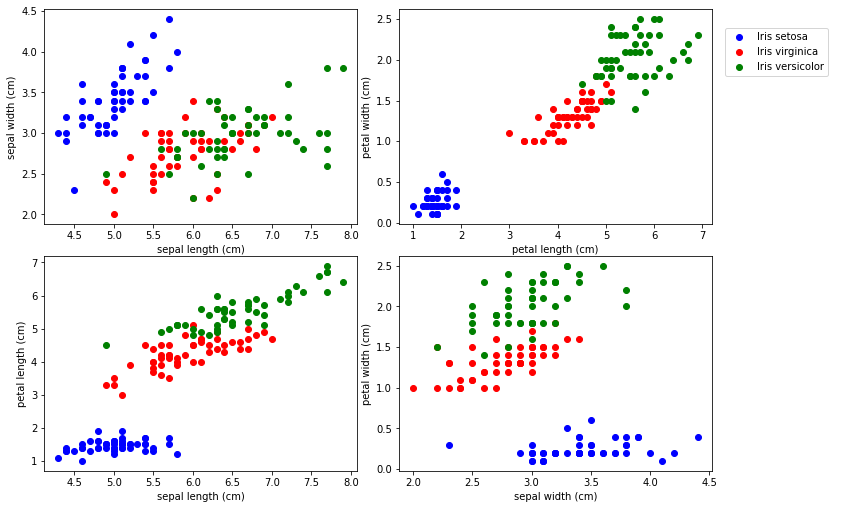

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

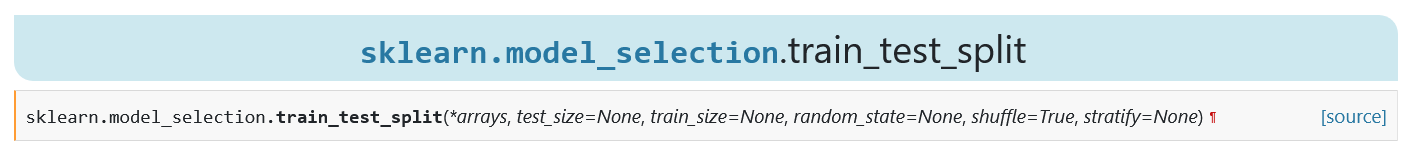

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

# train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
#                                                     df['target'].values, test_size=0.2,
#                                                     random_state=33)

train_X, test_X, train_y, test_y = train_test_split(iris.data,
                                                    iris.target, test_size=0.2,
                                                    random_state=33)

In [ ]:
test_X.shape

(30, 4)

In [ ]:
X_train = torch.tensor(train_X)
X_test = torch.tensor(test_X)
y_train = torch.tensor(train_y).reshape(-1, 1)
y_test = torch.tensor(test_y).reshape(-1, 1)

In [ ]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [ ]:
X_train.size()

torch.Size([120, 4])

In [ ]:
y_train.size()

torch.Size([120, 1])

## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.tensor(data),torch.tensor(labels))

In [ ]:
len(iris)

150

In [ ]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [ ]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.9000, 3.0000, 1.4000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.7000, 3.2000, 1.3000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.6000, 3.1000, 1.5000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([5.0000, 3.6000, 1.4000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([5.4000, 3.9000, 1.7000, 0.4000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.6000, 3.4000, 1.4000, 0.3000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([5.0000, 3.4000, 1.5000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.4000, 2.9000, 1.4000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([4.9000, 3.1000, 1.5000, 0.1000], dtype=torch.float64), tensor(0., dtype=torch.float64))
(tensor([5.4000, 3.7000, 1.500

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [ ]:
iris_loader = DataLoader(iris, batch_size=15, shuffle=True)
print(iris_loader)

In [ ]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[5.2000, 2.7000, 3.9000, 1.4000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000]], dtype=torch.float64), tensor([1., 1., 2., 2., 1., 0., 0., 0., 2., 2., 2., 0., 2., 2., 1.],
       dtype=torch.float64)]
1 [tensor([[5.1000, 3.8000, 1.5000, 0.3000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.3000, 2.5000, 4.9000, 

In [ ]:
next(iter(iris_loader))

[tensor([[5.0000, 2.3000, 3.3000, 1.0000],
         [5.8000, 2.7000, 3.9000, 1.2000],
         [4.9000, 2.4000, 3.3000, 1.0000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [5.0000, 3.4000, 1.5000, 0.2000],
         [5.7000, 2.5000, 5.0000, 2.0000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [6.3000, 2.8000, 5.1000, 1.5000],
         [6.4000, 3.1000, 5.5000, 1.8000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [5.4000, 3.0000, 4.5000, 1.5000],
         [5.0000, 3.0000, 1.6000, 0.2000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [5.6000, 2.7000, 4.2000, 1.3000]], dtype=torch.float64),
 tensor([1., 1., 1., 0., 0., 2., 0., 2., 2., 2., 1., 1., 0., 0., 1.],
        dtype=torch.float64)]

In [ ]:
len(list(iris_loader))

10

In [ ]:
print(list(iris_loader))

[[tensor([[5.5000, 4.2000, 1.4000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.7000, 3.1000, 5.6000, 2.4000]], dtype=torch.float64), tensor([0., 0., 1., 1., 0., 0., 2., 1., 2., 0., 1., 2., 2., 1., 2.],
       dtype=torch.float64)], [tensor([[6.4000, 3.2000, 4.5000, 1.5000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [5.6000, 2.8000, 4.9000, 2.

In [ ]:
len((list(iris_loader)))

10

In [ ]:
print((iris_loader))

## A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.